# 2D Dynamic Programming

If the result of the subproblem depends on two variables, this is where 2D DP comes into play.

> Problem: Unique Paths.
> 
> Count the number of unique paths from  top left to bottom right. ONLY allowed to move down or right

## Brute Force Approach

Brute Force will explore all possible paths, and just return count if we do find such paths.

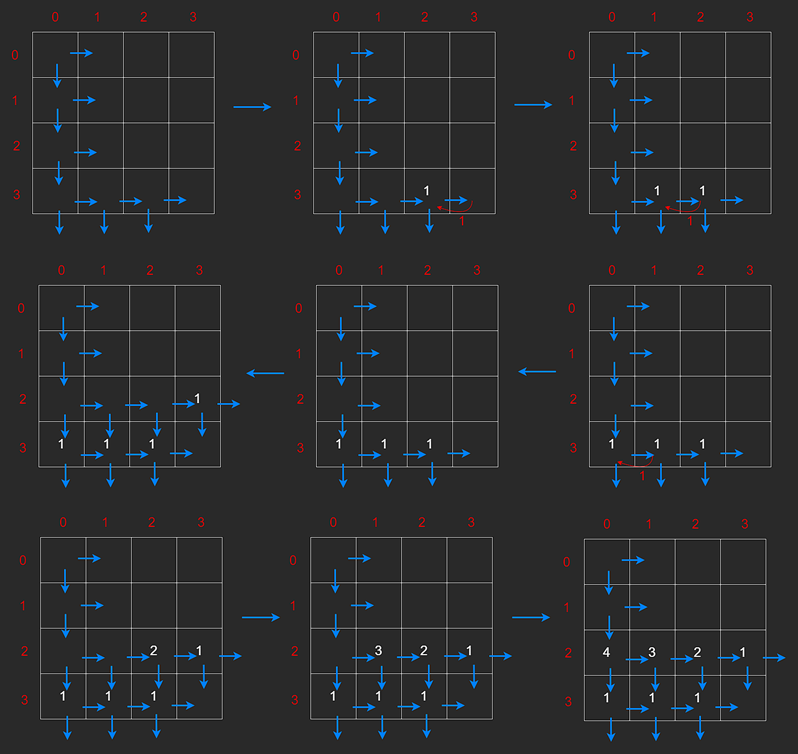

In [ ]:
# Brute Force - Time: O(2 ^ (n + m)), Space: O(n + m)
def bruteForce(r, c, rows, cols):
    if r == rows or c == cols:
        return 0
    #reached target
    if r == rows - 1 and c == cols - 1:
        return 1
    
    return (bruteForce(r + 1, c, rows, cols) +  
            bruteForce(r, c + 1, rows, cols))

However, with this approach we end up calculating a value at every single coordinating by doing the full work of exploration, and we'll also end up visiting the same coordinate multiple times. Time complexity is $O(2^{n+m})$, since we have 2 options to go at every patch, and at worst will explore every patch.

## Dynamic Programming

### Top-Down (Memoization)

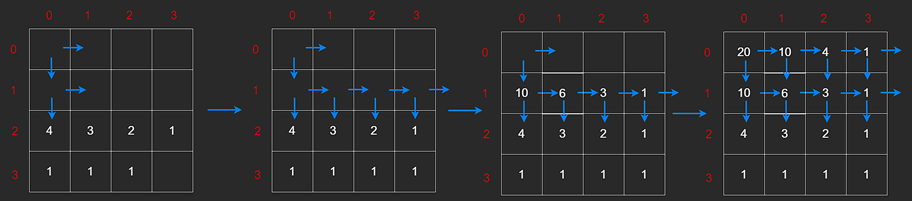

Very similar to brute force, but saves us a lot of unneccessary work. If we want to get `[0,1]`, we don't have to calculate `[1,1]` again because it exists in our cache.

In [ ]:
#we pass around the edited cache every call

# Memoization - Time and Space: O(n * m)
def memoization(r, c, rows, cols, cache):
    if r == rows or c == cols:
        return 0
    if cache[r][c] > 0:
        return cache[r][c]
    if r == rows - 1 and c == cols - 1:
        return 1
    
    cache[r][c] = (memoization(r + 1, c, rows, cols, cache) +  
        memoization(r, c + 1, rows, cols, cache))
    return cache[r][c]

# #this is the cache
# cache=[[0]*m for r in range(n)]


### Bottom-Up (Tabulation)

start from the bottom right and work our way up to the top left. The order we perform these operations is super important!. Need to calc bottom row first, then from right to left.

Note that the *rightmost column is just all `1`, and the bottom row is also all `1`*, as there's only one way to get to the target from the rightmost column and bottomost row.

In [ ]:
# Dynamic Programming - Time: O(n * m), Space: O(m), where m is num of cols
def dp(rows, cols):
    #this is technically the row below the bottom-most row, like a dummy row
    prevRow = [0] * cols

    #start from row-1 all the way till (including) row 0
    for r in range(rows - 1, -1, -1):
        #make it temporarily zero
        curRow = [0] * cols
        #set the rightmost elem to 1
        curRow[cols - 1] = 1

        #from the second-last column all the way till the column 0
        for c in range(cols - 2, -1, -1):
            #get the bottom value and the left value
            curRow[c] = curRow[c + 1] + prevRow[c]
        #update the prevRow
        prevRow = curRow
    return prevRow[0] 


- we need only a previous row to calculate the values at any given row, we can initialize an initial row with all 0s to calculate the bottom-most row
- Our first for loop decrements the row number and at each row number, we initialize a row full of 0s, and assign 1 to the right-most column
- We then use the inner for loop to go through every column in the row and calculate its value in the same way we demonstrated in the visuals before
  - add the bottom and right elem
- Technically we literally only need to keep prevRow at any point to get the above row

The time complexity of this approach is still $O(n∗m)$, where $n is the number of rows and m is the number of columns. The space complexity is $O(m)$, where m is the number of columns, since we only have up to two rows in memory at any given time.

---

## Problem: Unique Paths II

You are given an m x n integer array grid. There is a robot initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either *down or right at any point* in time.

An obstacle and space are marked as `1` or `0` respectively in grid. A path that the robot takes *cannot include any square that is an obstacle.*

Return the number of possible unique paths that the robot can take to reach the bottom-right corner.

In [ ]:
#my shitty NP bottom-up DP approach
import numpy as np
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        #this is technically the row below the bottom-most row
        grid=np.array(obstacleGrid)
        rows,cols=grid.shape
        
        #initialize the matrix with proper bottom-most and right-most row
        value=np.ones(grid.shape)

        #init bottom row
        for c in range(cols):
            if grid[rows-1,c]==1:
                value[rows-1,:c+1]=0
        #init right column
        for r in range(rows):
            if grid[r,cols-1]==1:
                value[:r+1,cols-1]=0
        
        print(value)

        #start from row-2 all the way till (including) row 0
        for r in range(rows - 2, -1, -1):
            #from the second-last column all the way till the column 0
            for c in range(cols - 2, -1, -1):
                #face obstacle, set this to zero as no path possible
                if grid[r,c]==1:
                    value[r,c]=0
                else:
                    #get the bottom value and the left value
                    value[r,c] = value[r,c+1]+value[r+1,c]
                print('row',r,'col',c,'value',value[r,c])
        return int(value[0,0])


In [ ]:
#this is a recursive top-down approach
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        m, n = len(obstacleGrid), len(obstacleGrid[0])
        #this stores the values where key:value is patch:num_ways_to_target
        #caching which already includes the target, very neat
        dp = {(m-1, n-1): 1 if obstacleGrid[-1][-1] == 0 else 0}

        def dfs(i, j):
            #caching
            if (i, j) in dp: return dp[(i, j)]

            #empty res to pile on more stuff
            res = 0
            #go to the right
            if (i < m-1 and obstacleGrid[i+1][j] == 0): res += dfs(i+1, j)
            #go down
            if (j < n-1 and obstacleGrid[i][j+1] == 0): res += dfs(i, j+1)

            dp[(i, j)] = res
            return res

        return dfs(0, 0) if obstacleGrid[0][0] == 0 else 0